# Logistic regression

For each word count how many times it is used in good and bad jokes (positive and negative frequency). For each joke some up this frequencies for all words (except stop words). Use logistic regression to classify jokes based on these features.

In [2]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
from src.utils import LoadIndices, LoadDatasets

import logging

import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download("stopwords")
stopwords = set(nltk.corpus.stopwords.words("russian"))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Load datasets
an_jokes, bash_jokes = LoadDatasets()

# Load direct and inverted indices
an_direct, an_inverted, bash_direct, bash_inverted = LoadIndices()

In [19]:
# Train and test samples indices
def TrainTestIdx(jokes, train_share = 0.75):
    #N = len(jokes)
    sss = StratifiedShuffleSplit(1, train_size = train_share)
    y = [joke[-1] for joke in jokes]
    return list(sss.split(np.zeros(len(jokes)), y))[0]

# How many times each word met in good and bad jokes
def getFreq(jokes, direct_index, idx):
    freq_good, freq_bad = {}, {}
    for i in idx:
        d = direct_index[i]
        for w in d:
            if w not in stopwords:
                if jokes[i][-1]:
                    freq_good[w] = freq_good.get(w, 0) + d[w]
                else:
                    freq_bad[w] = freq_bad.get(w, 0) + d[w]
    return freq_good, freq_bad

def ModelData(jokes, direct_index, train_idx):
    N = len(train_idx)
    X = np.zeros((N, 3))
    y = np.zeros(N)
    X[:,0] = 1
    for n in range(N):
        i = train_idx[n]
        for w in direct_index[i]:
            X[n,1] += freq_good.get(w, 0)
            X[n,2] += freq_bad.get(w, 0)
            y[n] = jokes[i][-1]
    return X, y

## Anecdotes classification

In [20]:
train_idx, test_idx = TrainTestIdx(an_jokes)
freq_good, freq_bad = getFreq(an_jokes, an_direct, train_idx)
X, y = ModelData(an_jokes, an_direct, train_idx)

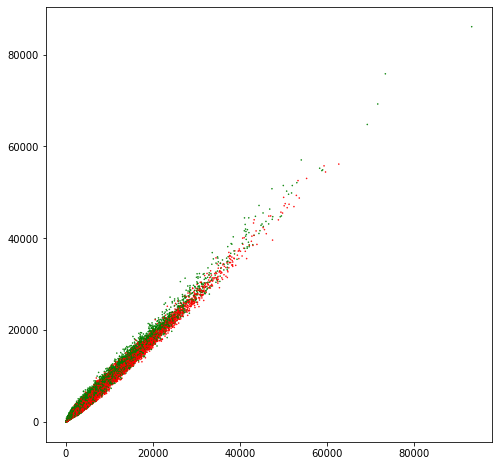

In [21]:
fig = plt.figure(figsize = (8,8))
colors = ['green', 'red']
plt.scatter(X[:,1], X[:,2], c = [colors[int(k)] for k in y], s = 0.3)

In [22]:
lr = LogisticRegression(penalty = 'none')
lr.fit(X, y)
print("Train accuracy: {:.3f}".format(lr.score(X, y)))

Xtest, y_test = ModelData(an_jokes, an_direct, test_idx)
print("Test accuracy: {:.3f}".format(lr.score(Xtest, y_test)))

Train accuracy: 0.600
Test accuracy: 0.588


## Bash quotes classification

In [23]:
train_idx, test_idx = TrainTestIdx(bash_jokes)
freq_good, freq_bad = getFreq(bash_jokes, bash_direct, train_idx)
X, y = ModelData(bash_jokes, bash_direct, train_idx)

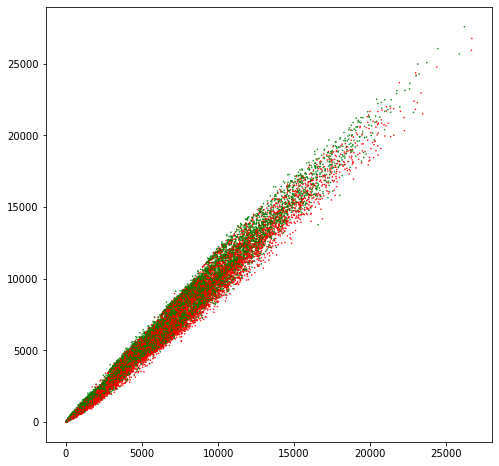

In [24]:
fig = plt.figure(figsize = (8,8))
colors = ['green', 'red']
plt.scatter(X[:,1], X[:,2], c = [colors[int(k)] for k in y], s = 0.3)

In [25]:
lr = LogisticRegression(penalty = 'none')
lr.fit(X, y)
print("Train accuracy: {:.3f}".format(lr.score(X, y)))

Xtest, y_test = ModelData(bash_jokes, bash_direct, test_idx)
print("Test accuracy: {:.3f}".format(lr.score(Xtest, y_test)))

Train accuracy: 0.593
Test accuracy: 0.566
